**Import Libaries**

In [1]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

**Task 1: Data set**

Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incomplete86IPKM/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


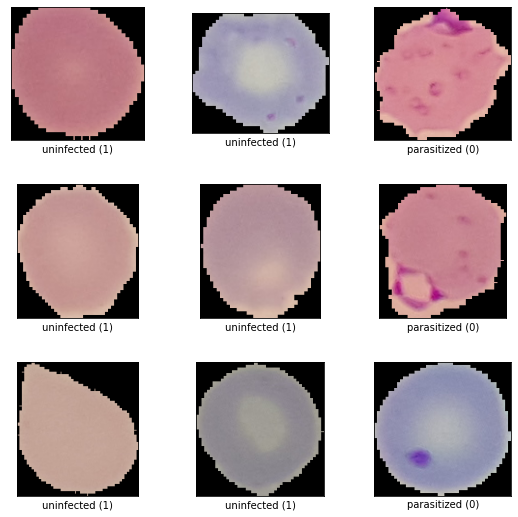

In [2]:
# Description: First, the malaria data set is loaded as a 2-tupel (image and label). 
#              We also used the show_example function to check, if the dataset is load properly and to get an insight into the images we are working with.

raw_dataset, raw_data_info = tfds.load('Malaria', split='train', as_supervised = True, with_info = True)

fig = tfds.show_examples(raw_dataset, raw_data_info)

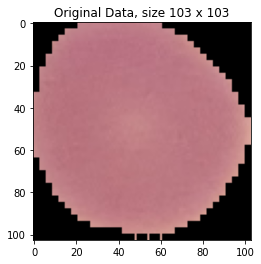

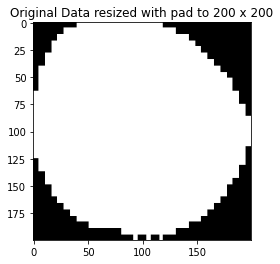

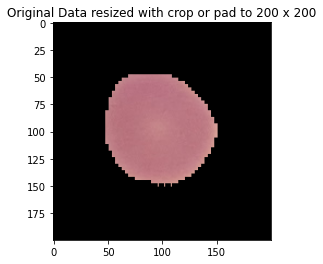

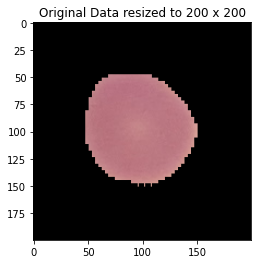

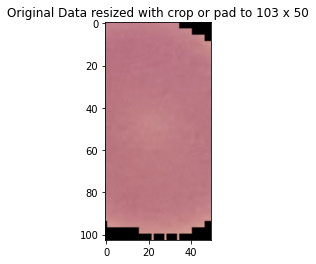

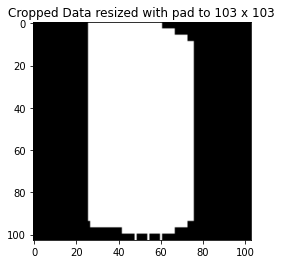

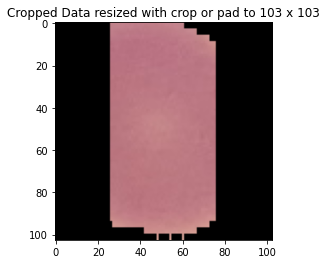

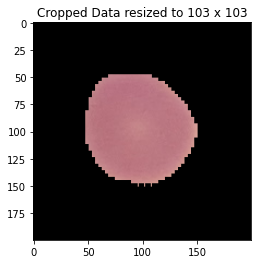

In [16]:
# Description: This is an example to show how the functions resize_with_pad and resize_with_crop_or_pad are working. 
#              If the shape is not a quadratic shape the image is filled up with zero (black) space to the shape given to the function.
#              resize_with_pad turn the color image into a black and white image. (height x width x 1)
#              resize_with_crop_or_pad resizes the image without loosing the color information. (height x width x 3)
#              Moreover, resize_with_pad streches the image if it's already in a quadratic format otherwise it fills up with zeros (black), and additionally the image is clipping.

for data in raw_dataset:
  plt.title('Original Data, size 103 x 103')
  plt.imshow(data[0].numpy())
  plt.show()

  plt.title('Original Data resized with pad to 200 x 200')
  data_pad = tf.image.resize_with_pad(data[0], 200, 200)
  plt.imshow(data_pad.numpy())
  plt.show()

  plt.title('Original Data resized with crop or pad to 200 x 200')
  data_crop_pad = tf.image.resize_with_crop_or_pad(data[0], 200, 200)
  plt.imshow(data_crop_pad.numpy())
  plt.show()

  plt.title('Original Data resized to 200 x 200')
  data_resized = tf.image.resize(data[0], [200, 200])
  plt.imshow(data_crop_pad.numpy())
  plt.show()

  plt.title('Original Data resized with crop or pad to 103 x 50')
  data_crop = tf.image.resize_with_crop_or_pad(data[0], 103, 50)
  plt.imshow(data_crop.numpy())
  plt.show()

  plt.title('Cropped Data resized with pad to 103 x 103')
  data_repad = tf.image.resize_with_pad(data_crop, 103, 103)
  plt.imshow(data_repad.numpy())
  plt.show()

  plt.title('Cropped Data resized with crop or pad to 103 x 103')
  data_crop_repad = tf.image.resize_with_crop_or_pad(data_crop, 103, 103)
  plt.imshow(data_crop_repad.numpy())
  plt.show()

  plt.title('Cropped Data resized to 103 x 103')
  data_resized = tf.image.resize(data_crop, [103, 103])
  plt.imshow(data_crop_pad.numpy())
  plt.show()
  
  break


In [4]:
# Determines the maximum height and width of all images in the dataset.
def image_max_height_max_width(dataset):
  max_img_height = 0           
  max_img_width = 0
  for (input, target) in dataset:      
    img_shape = input.shape
    if img_shape[0] > max_img_height: 
      max_img_height = img_shape[0]
    if img_shape[1] > max_img_width: 
      max_img_width = img_shape[1]   
  return max_img_height, max_img_width

In [14]:
# Description: We printed 10 different images with their shapes displaying in the title. The images are randomly choosen from the complete dataset.
#              What we can see is that the image are not presented in the same size. Because the feature (the cell) is represented on black background, which is not relevant for the problem, we choose Zero-Padding to reshape the images.
#              Givin the results from our test before, we choose to use resize_with_crop_or_pad in our code.

img_max_height, img_max_width = image_max_height_max_width(raw_dataset)     
padded_images = raw_dataset.map(lambda inp, tar: tf.image.resize_with_crop_or_pad(inp, img_max_height, img_max_width))

data_index = np.random.randint(0, high = len(raw_dataset), size = 10)
print(data_index)

for data in raw_data
for i in data_index:
  data = raw_dataset.take(0)
  print(raw_dataset)
  #shape = raw_dataset[i].shape
  #print(shape)
  #plt.title('Original Data, Size: ')
  #plt.imshow(raw_dataset[i].numpy())
  #plt.show()



[12168  9366 10218 19520  3996 26885 14114   918 15973  9097]
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [ ]:
# Description: We choose randomly the size of test and train data, but taken in to account, that the size of training data is >> than the size of the test data and the sum of both equals the size of the complete dataset.
#              At last the preprocessing with ... is done.